<center><img src="redpopcorn.jpg"></center>

# **Requirements: Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [ ]:
# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

In [ ]:
# Filter the to keep only movies released in the 1990s
# Start by filtering out movies that were released before 1990
subset = netflix_subset[(netflix_subset["release_year"] >= 1990)]

In [ ]:
# And then do the same to filter out movies released on or after 2000
movies_1990s = subset[(subset["release_year"] < 2000)]

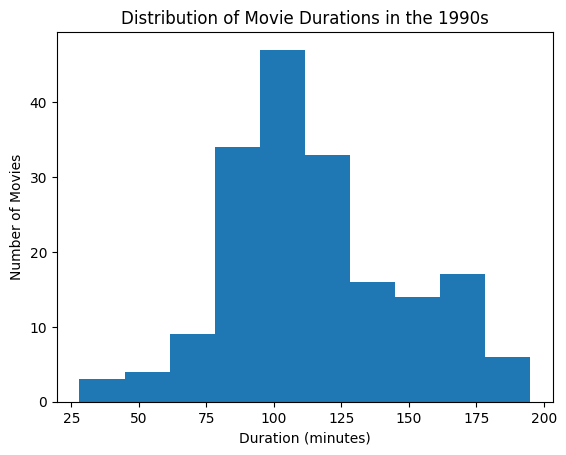

In [ ]:
# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

duration = 100

In [ ]:
# Filter the data again to keep only the Action movies
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]


In [ ]:
# Assuming the code provided is in a Jupyter Notebook cell and 'action_movies_1990s' DataFrame is available

num_action_movies = len(action_movies_1990s)
print(f"The number of action movies in the 1990s is: {num_action_movies}")


The number of action movies in the 1990s is: 48


In [ ]:
# Start the counter
short_movie_count = 0

In [ ]:
# Loop through the 'duration' column of the 'action_movies_1990s' DataFrame
for duration in action_movies_1990s["duration"]:
    # Check if the movie duration is less than 100 minutes
    if duration < 100:
        # Increment the counter if the movie is short
        short_movie_count += 1

# Print the number of short action movies in the 1990s
print(f"The number of short action movies in the 1990s is: {short_movie_count}")


The number of short action movies in the 1990s is: 20


In [ ]:
# Iterate over the labels and rows of the DataFrame and check if the duration is less than 90, if it is, add 1 to the counter, if it isn't, the counter should remain the same
for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

7


##**How has the number of movies and TV shows changed over the decades?**

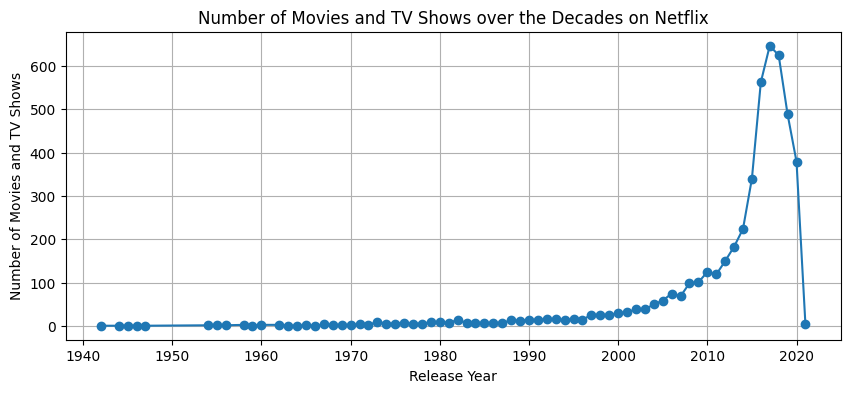

In [ ]:
# prompt: How has the number of movies and TV shows changed over the decades?

# Group the data by release year and count the number of movies and TV shows
release_year_counts = netflix_df.groupby('release_year')['show_id'].count()

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Number of Movies and TV Shows over the Decades on Netflix')
plt.grid(True)
plt.show()


##**What were the most popular movie genres in the 1990s vs. the 2000s?**


In [ ]:

# Filter for movies in the 1990s
movies_1990s = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["release_year"] >= 1990) & (netflix_df["release_year"] < 2000)]

# Filter for movies in the 2000s
movies_2000s = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["release_year"] >= 2000) & (netflix_df["release_year"] < 2010)] # Limiting to 2000-2009 for a fair comparison

# Function to get top genres
def top_genres(df, top_n=5):
    genre_counts = df['genre'].str.split(', ').explode().value_counts()
    return genre_counts.head(top_n)

# Get top genres for each decade
top_genres_1990s = top_genres(movies_1990s)
top_genres_2000s = top_genres(movies_2000s)

print("Top genres in the 1990s:")
print(top_genres_1990s)
print("\nTop genres in the 2000s:")
top_genres_2000s


Top genres in the 1990s:
genre
Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Name: count, dtype: int64

Top genres in the 2000s:


,count
genre,
Comedies,163
Dramas,146
Action,127
Children,68
Horror Movies,27


##**Have movies become longer or shorter over time?**

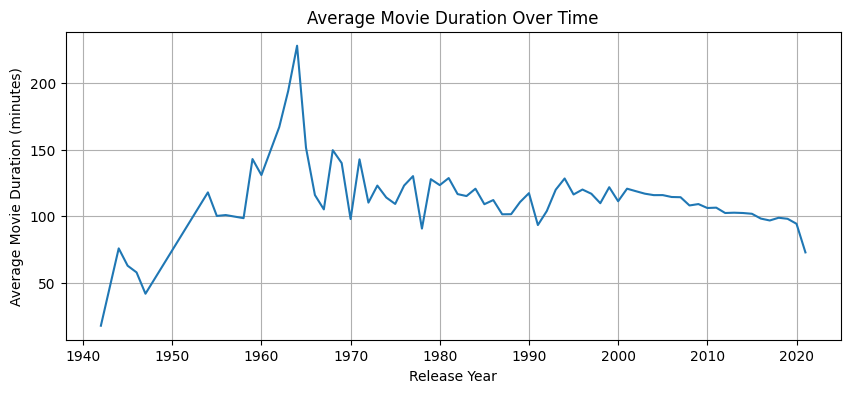

In [ ]:
# Group the data by release year and calculate the average movie duration
average_duration_by_year = netflix_df[netflix_df['type'] == 'Movie'].groupby('release_year')['duration'].mean()

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(average_duration_by_year.index, average_duration_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average Movie Duration (minutes)')
plt.title('Average Movie Duration Over Time')
plt.grid(True)
plt.show()

##**Which countries have contributed the most to movie production?**

In [ ]:
# Group by country and count the number of movies
country_counts = netflix_df.groupby('country')['show_id'].count()

In [ ]:
# Sort the counts in descending order and get the top 10 countries
top_10_countries = country_counts.sort_values(ascending=False).head(10)

print("Top 10 countries with the most movie productions:")
top_10_countries

Top 10 countries with the most movie productions:


,show_id
country,
United States,1886
India,864
United Kingdom,311
Canada,155
France,133
Spain,112
Egypt,91
Japan,81
Turkey,81


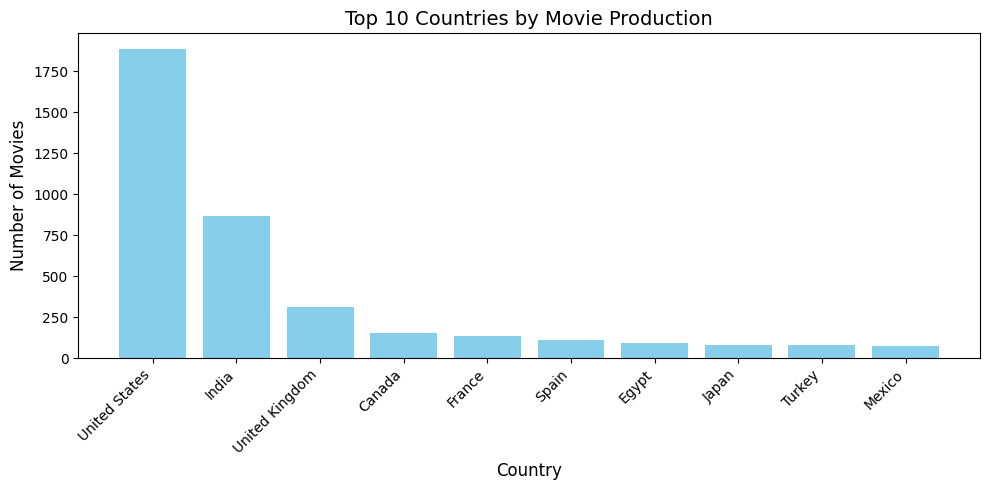

In [ ]:
plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization
plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Top 10 Countries by Movie Production", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


##**Which directors have produced the most content, and what genres do they focus on?**

In [ ]:
# Group by director and count the number of movies
director_counts = netflix_df.groupby('director')['show_id'].count()

# Sort the counts in descending order and get the top 10 directors
top_10_directors = director_counts.sort_values(ascending=False).head(10)

print("Top 10 directors with the most productions:")
print(top_10_directors)
# Explore genres for the top directors
for director in top_10_directors.index:
    director_movies = netflix_df[netflix_df['director'] == director]
    genre_counts = director_movies['genre'].str.split(', ').explode().value_counts()
    print(f"\nTop genres for {director}:")
    print(genre_counts.head(5)) # Display top 5 genres for each director

Top 10 directors with the most productions:
director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Name: show_id, dtype: int64

Top genres for Raúl Campos, Jan Suter:
genre
Stand-Up    18
Name: count, dtype: int64

Top genres for Marcus Raboy:
genre
Stand-Up    15
Name: count, dtype: int64

Top genres for Jay Karas:
genre
Stand-Up    13
Children     1
Name: count, dtype: int64

Top genres for Cathy Garcia-Molina:
genre
Comedies                7
Dramas                  4
International Movies    2
Name: count, dtype: int64

Top genres for Martin Scorsese:
genre
Classic Movies    6
Dramas            3
Documentaries     2
Children          1
Name: count, dtype: int64

Top genres for Jay Chapman:
genre
Stand-Up    12
Name: count, dtype: int64

Top gen